In [1]:
from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
bug_df = pd.read_csv('./bug/so details.txt')
bug_df.info()
bug_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   3636 non-null   object 
 1   Title          3636 non-null   object 
 2   Tags           3636 non-null   object 
 3   Score          3636 non-null   int64  
 4   AnswerCount    3636 non-null   int64  
 5   CommentCount   3636 non-null   int64  
 6   FavoriteCount  702 non-null    float64
 7   w2v_title      3636 non-null   object 
 8   w2v_tag        3636 non-null   object 
 9   title+tag      3636 non-null   object 
 10  w2v_title+tag  3636 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 312.6+ KB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount,w2v_title,w2v_tag,title+tag,w2v_title+tag
0,2012-07-10T14:09:47.123,How to enable the Java keyword assert in Eclip...,java eclipse assert assertions,64,6,1,8.0,"[-0.06919835747352668, -0.039465038904121945, ...","[-0.11689873645082116, 0.3525516837835312, 0.1...",How to enable the Java keyword assert in Eclip...,"[0.24032320082187653, 0.8867842555046082, 0.59..."
1,2012-10-08T12:46:21.523,Stack program in Java without using built-in c...,java data-structures,0,3,4,NaN,"[-0.15744633546897344, 0.026102273325834955, -...","[0.1382400542497635, -0.023948220536112785, -0...",Stack program in Java without using built-in c...,"[0.24032320082187653, 0.42886120080947876, 0.3..."


In [3]:
non_bug_df = pd.read_csv('./non_bug/so details.txt')
non_bug_df.info()
non_bug_df.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17986 entries, 0 to 17985
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CreationDate   17986 non-null  object 
 1   Title          17986 non-null  object 
 2   Tags           17986 non-null  object 
 3   Score          17986 non-null  int64  
 4   AnswerCount    17986 non-null  int64  
 5   CommentCount   17986 non-null  int64  
 6   FavoriteCount  3427 non-null   float64
 7   w2v_title      17986 non-null  object 
 8   w2v_tag        17986 non-null  object 
 9   title+tag      17986 non-null  object 
 10  w2v_title+tag  17986 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.5+ MB


,CreationDate,Title,Tags,Score,AnswerCount,CommentCount,FavoriteCount,w2v_title,w2v_tag,title+tag,w2v_title+tag
0,2018-08-06T01:49:50.053,Inconsistency in Java's compareTo method on St...,java comparator,0,0,3,NaN,"[0.1918523281812668, -0.25205946564674375, -0....","[0.007734555751085281, -0.09128731675446033, -...",Inconsistency in Java's compareTo method on St...,"[0.6235586404800415, 0.04729170724749565, 0.15..."
1,2018-08-06T01:49:50.053,Inconsistency in Java's compareTo method on St...,java comparator,0,0,3,NaN,"[0.1918523281812668, -0.25205946564674375, -0....","[0.007734555751085281, -0.09128731675446033, -...",Inconsistency in Java's compareTo method on St...,"[0.6235586404800415, 0.04729170724749565, 0.15..."


In [4]:
Score1, Score2 = bug_df['Score'].dropna().to_list(), non_bug_df['Score'].dropna().to_list()

Score = [Score1, Score2]


In [5]:
# df1['FavoriteCount'].dropna().to_list()

In [6]:
len(Score1),len(Score2)

(3636, 17986)

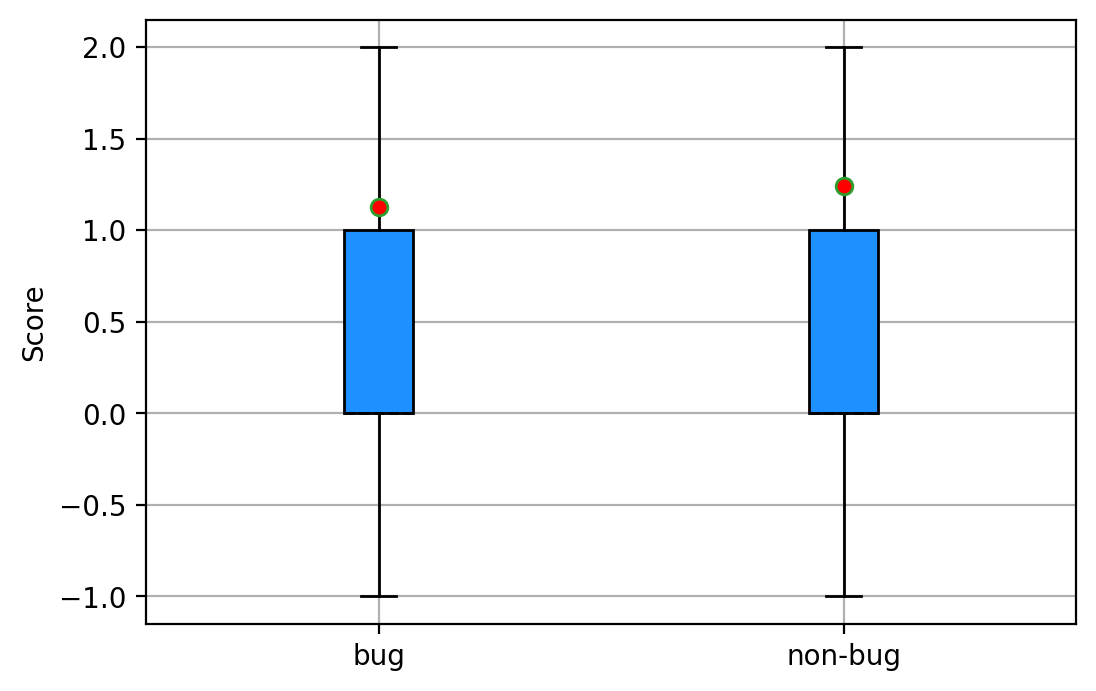

In [7]:
plt.figure(dpi=200)

plt.boxplot(Score,
            labels = ['bug','non-bug'],
            patch_artist=True,
            showmeans=True,
            boxprops = {'color':'black','facecolor':'#1E90FF'},
            showfliers = False,
            meanprops = {'marker':'o','markerfacecolor':'red'},
            medianprops = {'linestyle':'--','color':'black'},)
plt.grid()
plt.ylabel('Score')
# plt.yticks(range(2008, 2021), range(2008, 2021))
# plt.xticks(rotation=45)
plt.savefig('./pic/Score.jpg')
plt.show()

In [8]:
AnswerCount1, AnswerCount2 = bug_df['AnswerCount'].dropna().to_list(), non_bug_df['AnswerCount'].dropna().to_list()

AnswerCount = [AnswerCount1, AnswerCount2]


In [10]:
len(AnswerCount1),len(AnswerCount2)


(3636, 17986)

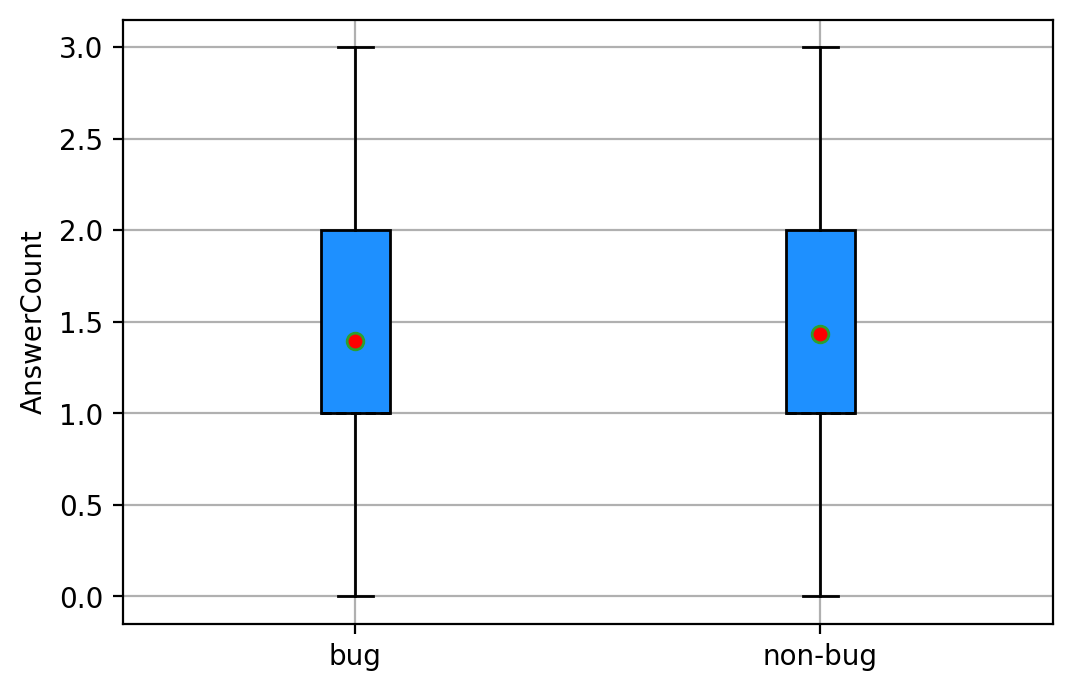

In [12]:
plt.figure(dpi=200)

plt.boxplot(AnswerCount,
            labels = ['bug','non-bug'],
            patch_artist=True,
            showmeans=True,
            boxprops = {'color':'black','facecolor':'#1E90FF'},
            showfliers = False,
            meanprops = {'marker':'o','markerfacecolor':'red'},
            medianprops = {'linestyle':'--','color':'black'},)
plt.grid()
plt.ylabel('AnswerCount')
# plt.yticks(range(2008, 2021), range(2008, 2021))
# plt.xticks(rotation=45)
plt.savefig('./pic/AnswerCount.jpg')
plt.show()

In [13]:
CommentCount1, CommentCount2 = bug_df['CommentCount'].dropna().to_list(), non_bug_df['CommentCount'].dropna().to_list()

CommentCount = [CommentCount1, CommentCount2]
len(CommentCount1),len(CommentCount2)

(3636, 17986)

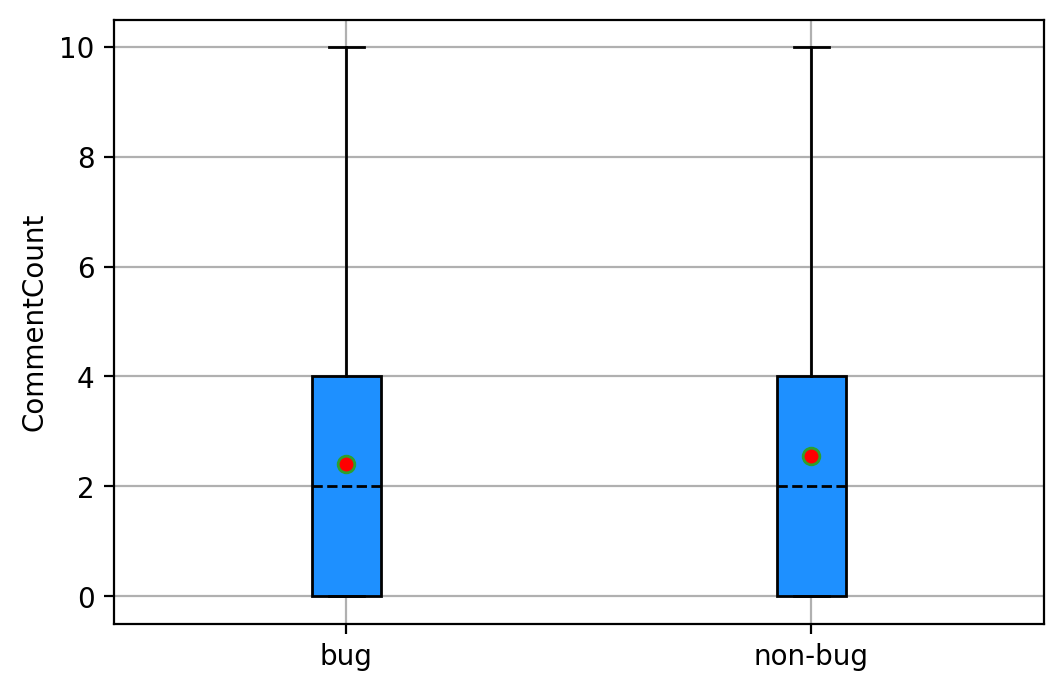

In [14]:
plt.figure(dpi=200)
# year_info = [[1,2,3],year_info[-1]]
plt.boxplot(CommentCount,
            labels = ['bug','non-bug'],
            patch_artist=True,
            showmeans=True,
            boxprops = {'color':'black','facecolor':'#1E90FF'},
            showfliers = False,
            meanprops = {'marker':'o','markerfacecolor':'red'},
            medianprops = {'linestyle':'--','color':'black'},)
plt.grid()
plt.ylabel('CommentCount')
# plt.yticks(range(2008, 2021), range(2008, 2021))
# plt.xticks(rotation=45)
plt.savefig('./pic/CommentCount.jpg')
plt.show()

In [15]:
FavoriteCount1, FavoriteCount2 = bug_df['FavoriteCount'].dropna().to_list(), non_bug_df['FavoriteCount'].dropna().to_list()

FavoriteCount = [FavoriteCount1, FavoriteCount2]
len(FavoriteCount1),len(FavoriteCount2)


(702, 3427)

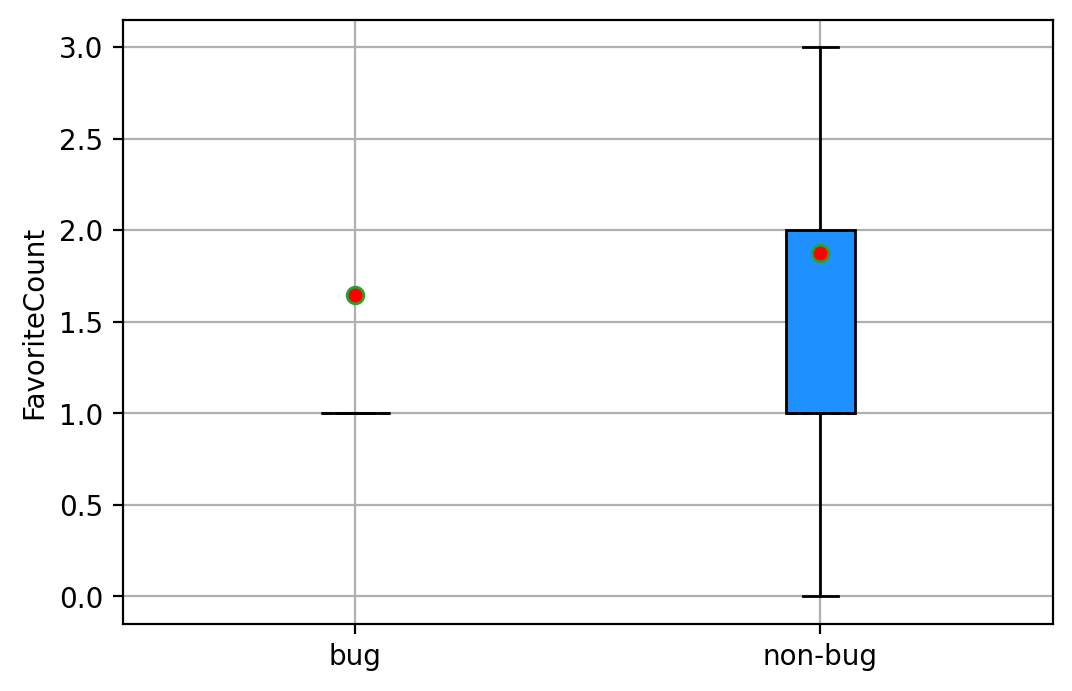

In [16]:
plt.figure(dpi=200)

plt.boxplot(FavoriteCount,
            labels = ['bug','non-bug'],
            patch_artist=True,
            showmeans=True,
            boxprops = {'color':'black','facecolor':'#1E90FF'},
            showfliers = False,
            meanprops = {'marker':'o','markerfacecolor':'red'},
            medianprops = {'linestyle':'--','color':'black'},flierprops={'marker':'o'})
plt.grid()
plt.ylabel('FavoriteCount')
# plt.yticks(range(2008, 2021), range(2008, 2021))
# plt.xticks(rotation=45)
plt.savefig('./pic/FavoriteCount.jpg')
plt.show()

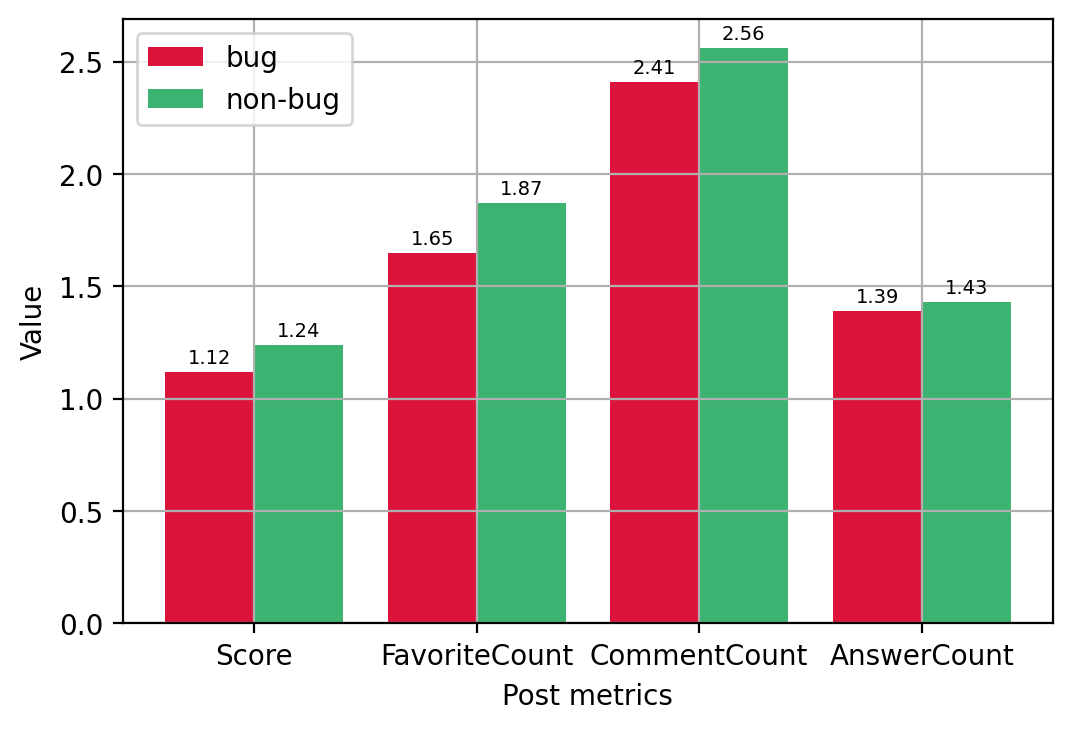

In [19]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(4)
men_means = [round(np.mean(Score1),2), round(np.mean(FavoriteCount1),2), round(np.mean(CommentCount1),2), round(np.mean(AnswerCount1),2)]
women_means = [round(np.mean(Score2),2), round(np.mean(FavoriteCount2),2), round(np.mean(CommentCount2),2), round(np.mean(AnswerCount2),2)]
listDate = ['Score', 'FavoriteCount', 'CommentCount', 'AnswerCount']

plt.figure(dpi=200)
total_width, n = 0.8, 2
width = total_width / n
x1 = x - width / 2
x2 = x1 + width


plt.xlabel("Post metrics")
plt.ylabel("Value")
plt.bar(x1, men_means, width=width, label="bug",color='#DC143C')
plt.bar(x2, women_means, width=width, label="non-bug", color='#3CB371')
plt.xticks(x, listDate)

for a, b in zip(x1, men_means):
	plt.text(a, b + 0.02, '%.2f' % b, ha='center', va='bottom', fontsize=7)

for a, b in zip(x2, women_means):
	plt.text(a, b + 0.02, '%.2f' % b, ha='center', va='bottom', fontsize=7)


plt.legend(loc='upper left',)
plt.grid()
plt.savefig('./pic/post att.jpg', bbox_inches = 'tight')
